In [109]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [110]:
df=pd.read_csv('/content/airline_review.csv',index_col=0)

In [111]:
df.shape

(38111, 16)

In [112]:
df.sample(10)

,Reviewer Names,Review Date,Review Text,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Wifi & Connectivity,Recommended
10986,F Darwyjawa,2017-05-26,✅ Verified Review | Singapore to Denpasar. In...,A330-300,Couple Leisure,Economy Class,Singapore to Denpasar,April 2017,5.0,3.0,3.0,4.0,5.0,3.0,NaN,yes
10297,Eric Huang,2023-05-06,✅ Trip Verified | This was a very bad experie...,Boeing 787,Solo Leisure,Economy Class,Singapore to Denpasar Bali,April 2023,3.0,5.0,1.0,1.0,2.0,1.0,NaN,no
21574,N Carter,2016-08-07,✅ Verified Review | Atlanta to Rome with Delta...,Solo Leisure,Solo Leisure,Economy Class,ATL to FCO,July 2016,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no
23801,M Keane,2021-05-27,✅ Trip Verified | I was with my sister-in-law...,Family Leisure,Family Leisure,Economy Class,Jacksonville to Washington via Rochester,May 2021,1.0,1.0,NaN,NaN,NaN,NaN,NaN,no
25014,L Harris,2018-08-22,✅ Trip Verified | There was a delay of two hou...,Solo Leisure,Solo Leisure,Economy Class,Washington to Chicago,August 2018,1.0,1.0,1.0,1.0,NaN,NaN,NaN,no
13996,G Maylam,2016-08-30,The flight was late leaving Copenhagen to the ...,Couple Leisure,Couple Leisure,Economy Class,CPH to SIN via ZRH,August 2016,4.0,5.0,4.0,4.0,5.0,5.0,NaN,yes
257,Gustavo Sirna Barbosa,2023-08-04,✅ Trip Verified | As usual the flight is delay...,Solo Leisure,Solo Leisure,Economy Class,London to Lyon,August 2023,1.0,1.0,NaN,NaN,NaN,NaN,NaN,no
18281,Rony Liebheit,2016-02-01,While in Nepal we were informed of a 2 hr dela...,Couple Leisure,Couple Leisure,Economy Class,KTM to STR via IST,January 2016,3.0,3.0,3.0,3.0,1.0,2.0,NaN,no
10648,C Young,2019-06-29,✅ Trip Verified | Singapore to Hong Kong. Flig...,A380,Family Leisure,Economy Class,Singapore to Hong Kong,June 2019,4.0,5.0,5.0,4.0,5.0,5.0,NaN,yes
22582,Haider Istanbouli,2023-10-22,✅ Trip Verified | The team together were excep...,Business,Business,Economy Class,Chicago to Zurich,October 2023,3.0,5.0,3.0,1.0,5.0,1.0,5.0,yes


### Formating Column Names

In [113]:
df.columns=df.columns.str.lower()

In [114]:
df.columns=df.columns.str.replace(' ', '_')

In [115]:
df.columns

Index(['reviewer_names', 'review_date', 'review_text', 'aircraft',
       'type_of_traveller', 'seat_type', 'route', 'date_flown', 'seat_comfort',
       'cabin_staff_service', 'food_&_beverages', 'inflight_entertainment',
       'ground_service', 'value_for_money', 'wifi_&_connectivity',
       'recommended'],
      dtype='object')

In [116]:
import matplotlib.pyplot as plt
import seaborn as sb

### Checking Missing Values

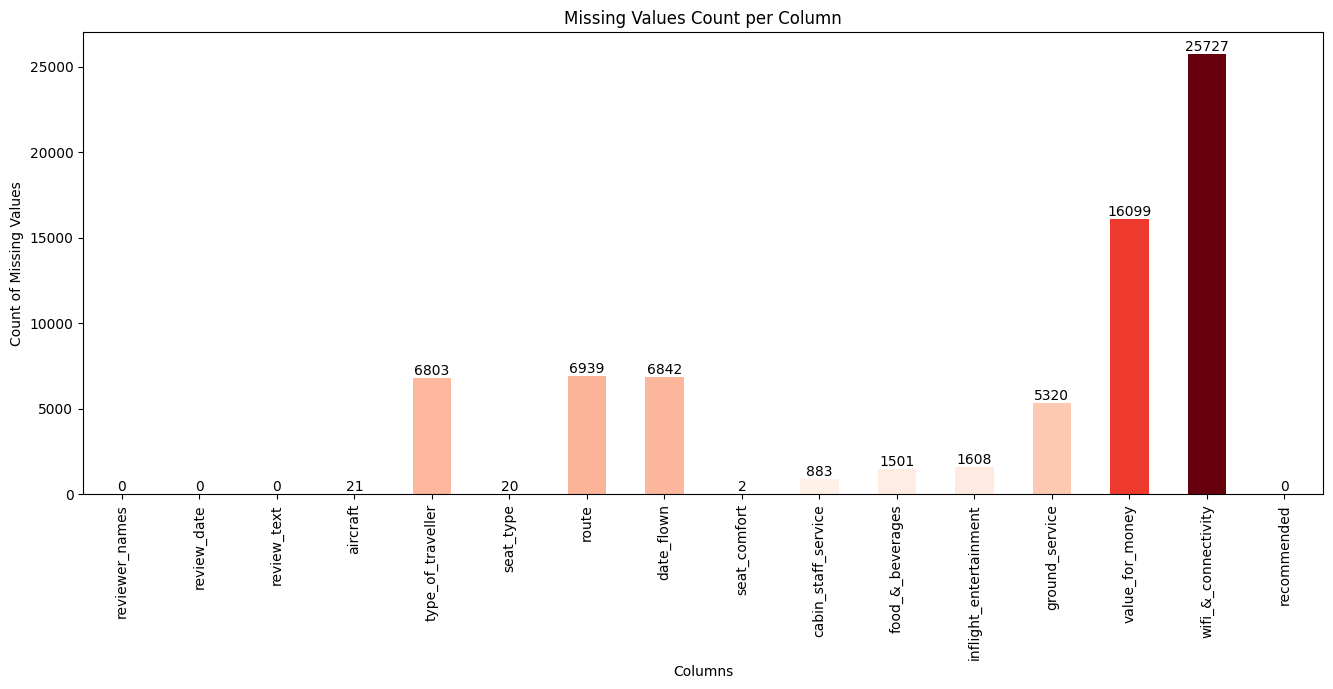

In [117]:
na_counts = df.isna().sum()

# Create a larger figure
plt.figure(figsize=(16, 6))

# Normalize the counts for coloring
norm = plt.Normalize(na_counts.min(), na_counts.max())
colors = plt.cm.Reds(norm(na_counts))

# Create the bar plot with the specified colors
ax = na_counts.plot(kind='bar', color=colors)

# Add labels to each bar
for i, count in enumerate(na_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Missing Values Count per Column')
plt.show()

In [118]:
df=df.dropna()

In [119]:
df.isna().sum()

,0
reviewer_names,0
review_date,0
review_text,0
aircraft,0
type_of_traveller,0
seat_type,0
route,0
date_flown,0
seat_comfort,0
cabin_staff_service,0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12330 entries, 0 to 37577
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   reviewer_names          12330 non-null  object 
 1   review_date             12330 non-null  object 
 2   review_text             12330 non-null  object 
 3   aircraft                12330 non-null  object 
 4   type_of_traveller       12330 non-null  object 
 5   seat_type               12330 non-null  object 
 6   route                   12330 non-null  object 
 7   date_flown              12330 non-null  object 
 8   seat_comfort            12330 non-null  float64
 9   cabin_staff_service     12330 non-null  float64
 10  food_&_beverages        12330 non-null  float64
 11  inflight_entertainment  12330 non-null  float64
 12  ground_service          12330 non-null  float64
 13  value_for_money         12330 non-null  float64
 14  wifi_&_connectivity     12330 non-null  flo

# Labelling The Sentiment

To label our data, we will use both TextBlob and VaderSentiment. The rationale for employing both methods is to account for potential discrepancies in sentiment analysis. By considering only those reviews that yield consistent results from both approaches, we can reduce error and enhance the reliability of our labeling process.

### Using TextBlob For Labelling




In [121]:
from textblob import TextBlob
def textblob_sentiment(text):
    analysis = TextBlob(text)
    # TextBlob returns polarity, where > 0 is positive, < 0 is negative, and 0 is neutral
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [122]:
df['textblob_sentiment'] = df['review_text'].apply(textblob_sentiment)

In [123]:
df.sample(10)

,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,ground_service,value_for_money,wifi_&_connectivity,recommended,textblob_sentiment
7210,A Dercker,2019-11-11,✅ Trip Verified | Doha to Hong Kong. Check In...,Boeing 777,Business,Business Class,Doha to Hong Kong,October 2019,2.0,5.0,2.0,4.0,4.0,3.0,2.0,no,positive
25213,Katy Nguyen,2018-05-27,❌ Not Verified | Houston to Fort Lauderdale. ...,Family Leisure,Family Leisure,Premium Economy,Houston to Fort Lauderdale,October 2017,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,negative
37330,O Thomas,2015-11-05,Houston to Manchester via Chicago with America...,Family Leisure,Family Leisure,Economy Class,IAH to MAN via ORD,November 2015,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,negative
10943,Franz Koepernik,2017-09-08,✅ Verified Review | Munich to Singapore retur...,A350-900,Business,Business Class,Munich to Singapore,September 2017,5.0,5.0,5.0,5.0,4.0,4.0,5.0,yes,positive
24530,William Keating,2019-05-02,Not Verified | Nashville to San Francisco. Pai...,Solo Leisure,Solo Leisure,Economy Class,Nashville to San Francisco,April 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,negative
6969,Jerome Toulouse,2021-07-04,✅ Trip Verified | This was by far my best exp...,Solo Leisure,Solo Leisure,Economy Class,Paris to Male via Doha,July 2021,5.0,5.0,5.0,5.0,5.0,5.0,5.0,yes,positive
25147,J Luemer,2018-06-26,✅ Trip Verified | Chicago to Phoenix. Due to ...,A319,Business,Premium Economy,Chicago to Phoenix,June 2018,5.0,5.0,4.0,5.0,5.0,5.0,4.0,yes,positive
21343,M Garmen,2017-09-13,✅ Verified Review | Salt Lake City to Raleigh...,Business,Business,First Class,Salt Lake City to Raleigh Durham,September 2017,1.0,3.0,1.0,1.0,1.0,1.0,1.0,no,positive
24461,Brittany Flanders,2019-06-06,Not Verified | My family and I had a connecti...,Family Leisure,Family Leisure,Economy Class,Tampa to Manchester,June 2019,1.0,2.0,2.0,1.0,3.0,2.0,1.0,no,positive
4320,A Marshidah,2020-01-23,✅ Trip Verified | Singapore to New York via D...,Family Leisure,Family Leisure,Economy Class,Singapore to New York via Dubai,December 2019,3.0,1.0,1.0,3.0,4.0,2.0,1.0,no,positive


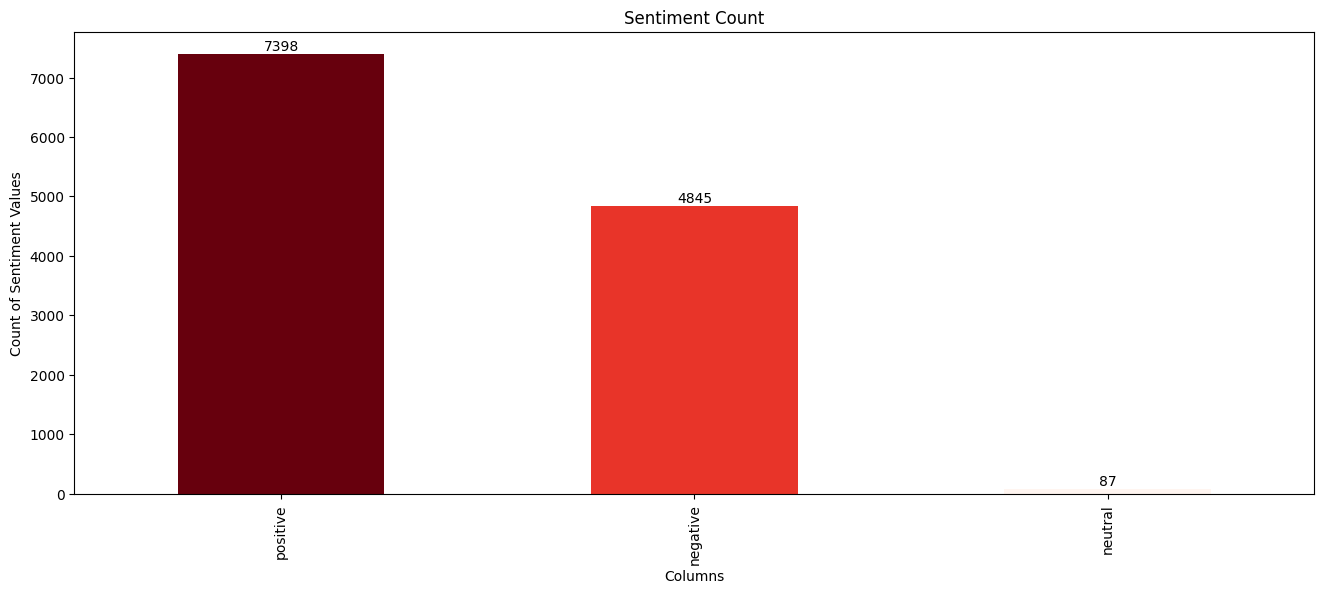

In [124]:
tb_counts = df['textblob_sentiment'].value_counts()

# Create a larger figure
plt.figure(figsize=(16, 6))

# Normalize the counts for coloring
norm = plt.Normalize(tb_counts.min(), tb_counts.max())
colors = plt.cm.Reds(norm(tb_counts))

# Create the bar plot with the specified colors
ax = tb_counts.plot(kind='bar', color=colors)

# Add labels to each bar
for i, count in enumerate(tb_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.xlabel('Columns')
plt.ylabel('Count of Sentiment Values')
plt.title('Sentiment Count')
plt.show()

In [125]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [126]:
df["sentiment_score"] = df["review_text"].apply(get_sentiment)

In [127]:
df.rename(columns={'textblob_sentiment':'sentiment'},inplace=True)

In [128]:
df.sample(10)

,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,sentiment_score
4747,A Harlow,2018-05-13,✅ Trip Verified | Birmingham to Bangkok via Du...,A380-800,Solo Leisure,Economy Class,Birmingham to Bangkok via Dubai,May 2018,5.0,5.0,3.0,5.0,3.0,4.0,5.0,yes,positive,0.239383
24530,William Keating,2019-05-02,Not Verified | Nashville to San Francisco. Pai...,Solo Leisure,Solo Leisure,Economy Class,Nashville to San Francisco,April 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,negative,-0.033333
4360,Carol Lee,2019-12-06,Not Verified | Birmingham to Hong Kong via Du...,A380,Solo Leisure,Economy Class,Birmingham to Hong Kong via Dubai,November 2019,3.0,4.0,1.0,5.0,1.0,3.0,2.0,no,positive,0.047000
24368,R Neale,2019-07-19,✅ Trip Verified | Omaha to Chicago. 1055 flig...,Family Leisure,Family Leisure,Economy Class,Omaha to Chicago,July 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,positive,0.157143
17017,T Marqim,2021-12-15,✅ Trip Verified | Worst ground customer servi...,Solo Leisure,Solo Leisure,Economy Class,Chicago to Lahore via Istanbul,December 2021,3.0,2.0,2.0,1.0,1.0,1.0,2.0,no,negative,-0.825000
1249,Michael LiBassi,2018-10-07,Not Verified | London Heathrow to Milan Malpen...,Couple Leisure,Couple Leisure,Business Class,London Heathrow to Milan Malpensa,October 2018,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,negative,-0.125000
20672,Makell Mitton,2019-09-08,✅ Trip Verified | San Antonio to Salt Lake Cit...,Business,Business,Economy Class,San Antonio to Salt Lake City,May 2019,5.0,5.0,5.0,5.0,5.0,5.0,5.0,yes,positive,0.327431
24688,Tara Rasta,2019-02-16,✅ Trip Verified | Los Angeles to Denver. I rea...,Couple Leisure,Couple Leisure,Economy Class,Los Angeles to Denver,February 2019,1.0,3.0,1.0,1.0,1.0,1.0,1.0,no,negative,-0.129487
36817,Eric Jordan,2016-10-28,Phoenix to Redmond/Bend with American Airlines...,Business,Business,Economy Class,PHX to RDM,October 2016,1.0,1.0,1.0,1.0,2.0,1.0,1.0,no,negative,-0.125000
4589,D Hanson,2018-12-29,✅ Trip Verified | New York to Cairo via Dubai...,A380,Solo Leisure,Business Class,New York to Cairo via Dubai,September 2018,5.0,5.0,5.0,4.0,4.0,3.0,4.0,yes,positive,0.195636


In [129]:
positive_reviews = df[df['sentiment'] == 'positive']
negative_reviews = df[df['sentiment'] == 'negative']

In [130]:
positive_reviews.shape

(7398, 18)

In [131]:
negative_reviews.shape

(4845, 18)

In [132]:
positive_sample_size = 4845
negative_sample_size = 4845

In [133]:
positive_sample = positive_reviews.sample(positive_sample_size, random_state=42)
negative_sample = negative_reviews.sample(negative_sample_size, random_state=42)

In [134]:
stratified_data = pd.concat([positive_sample, negative_sample])

In [135]:
stratified_data.sample(10)

,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,sentiment_score
5119,Mohammad Al-Adsani,2016-12-27,✅ Verified Review | I took a first class tick...,Boeing 777-300ER,Solo Leisure,First Class,DXB to KWI,December 2016,5.0,5.0,1.0,5.0,3.0,1.0,2.0,no,positive,0.057652
34732,Debra Jean Harris,2019-11-13,Not Verified | San Antonio to Albuquerque via...,Solo Leisure,Solo Leisure,Economy Class,San Antonio to Albuquerque via Dallas,November 2019,1.0,1.0,1.0,1.0,1.0,2.0,1.0,no,negative,-0.246825
2040,Susan Constantinou,2017-01-24,✅ Verified Review | We flew from Heathrow to ...,Couple Leisure,Couple Leisure,Economy Class,Larnaca to London Heathrow,January 2017,3.0,5.0,1.0,1.0,5.0,1.0,1.0,no,negative,-0.061251
6730,Alwaleed Althani,2022-09-08,✅ Trip Verified | Morning departure from Char...,Boeing 777-300,Couple Leisure,Business Class,Paris to Doha,September 2022,5.0,3.0,1.0,3.0,5.0,3.0,3.0,yes,negative,-0.141197
30790,Lucy Scott,2017-07-26,✅ Verified Review | Las Vegas to Gatwick via ...,Solo Leisure,Solo Leisure,Economy Class,Las Vegas to Gatwick via Vancouver,July 2017,4.0,5.0,3.0,3.0,5.0,3.0,4.0,yes,positive,0.322143
24353,Annie Rodriguez,2019-07-29,✅ Trip Verified | Tampa to Seattle via Denver...,Solo Leisure,Solo Leisure,Economy Class,Tampa to Seattle via Denver,July 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,negative,-0.525000
35110,Crystal Stephens,2019-06-27,"Not Verified | First off, I would like to say...",Family Leisure,Family Leisure,Economy Class,Tallahassee to Dallas,June 2019,3.0,2.0,1.0,1.0,2.0,1.0,1.0,no,negative,-0.157738
12291,Ray Alvin Cantos,2019-04-25,✅ Trip Verified | Booked a business class fli...,A330,Solo Leisure,Business Class,Singapore to Manila,April 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,negative,-0.088571
21069,B Sardan,2018-08-06,✅ Trip Verified | San Jose to Seattle. Flight...,Solo Leisure,Solo Leisure,Economy Class,San Jose to Seattle,August 2018,2.0,1.0,1.0,1.0,2.0,1.0,2.0,no,negative,-0.114583
37515,Matt Smith,2015-07-27,Every time I fly on an American Airlines they ...,Boeing 737,Business,Economy Class,Kansas City to Dallas to SLC,July 2015,1.0,2.0,1.0,1.0,1.0,1.0,1.0,no,negative,-0.006331


In [ ]:
stratified_data = stratified_data.reset_index(drop=True)
stratified_data.head()

In [136]:
stratified_data['sentiment'].value_counts()

,count
sentiment,
positive,4845
negative,4845


In [137]:
df=stratified_data.copy()

In [138]:
df['num_characters'] = df['review_text'].apply(len)

In [139]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [140]:
df['num_words'] = df['review_text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [141]:
df['num_sentences'] = df['review_text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [142]:
df.sample(5)

,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,inflight_entertainment,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,sentiment_score,num_characters,num_words,num_sentences
19993,R Martozi,2022-05-09,✅ Trip Verified | Worst experience ever for t...,Couple Leisure,Couple Leisure,Economy Class,New York to Santo Domingo,May 2022,1.0,1.0,...,1.0,1.0,1.0,1.0,no,negative,-0.097500,722,146,8
33594,Anyssa Meza,2021-12-04,✅ Trip Verified | We got to the airport in Mia...,Business,Business,Economy Class,"Miami, Florida to Los Angeles, California",December 2021,1.0,1.0,...,2.0,1.0,1.0,1.0,no,negative,-0.360833,503,108,7
28822,N Parthin,2019-10-28,✅ Trip Verified | Amsterdam to Dubai. First t...,Boeing 777-200,Solo Leisure,Economy Class,Amsterdam to Dubai,October 2019,2.0,4.0,...,3.0,1.0,1.0,2.0,no,negative,-0.228117,637,127,9
35272,Luis Eduardo Vieira mendes,2019-04-28,✅ Trip Verified | Cancun to Milan via Miami. ...,Boeing 777-200,Family Leisure,Economy Class,Cancun to Milan via Miami,April 2019,1.0,1.0,...,2.0,1.0,2.0,1.0,no,positive,0.061111,1574,350,12
19583,Frederick Bridgewater,2023-05-12,✅ Trip Verified | The review is to mention th...,Business,Business,First Class,Atlanta to Orlando,May 2023,5.0,5.0,...,5.0,5.0,5.0,3.0,yes,positive,0.458333,606,124,8


In [143]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,9690.000000,9690.000000,9690.000000
mean,841.598968,171.678741,9.494634
std,590.434068,121.883468,5.911902
min,115.000000,25.000000,1.000000
25%,435.000000,88.000000,6.000000
50%,669.000000,136.000000,8.000000
75%,1048.000000,215.000000,12.000000
max,3569.000000,783.000000,52.000000


##### Overview of the Summary Statistics:

* Count: Each of the three columns (num_characters, num_words, num_sentences) has
10,000 entries, indicating the total number of samples analyzed.

* Mean (Average):
  * Characters: The average text length is approximately 841 characters.
  * Words: On average, each entry contains about 171 words.
  * Sentences: Each entry has an average of about 9.5 sentences.

* Standard Deviation (std):

  * Characters: A standard deviation of about 590 indicates that there is considerable variation in text length across the entries.
  * Words: The standard deviation of approximately 122 suggests a moderate variation in the number of words.
  * Sentences: A standard deviation of about 5.9 indicates that the number of sentences also varies, but to a lesser extent.

* Minimum (min):

  * Characters: The shortest entry has 115 characters.
  * Words: The entry with the fewest words contains 25 words.
  * Sentences: The minimum number of sentences is 1.

* 25th Percentile (25%):

  * Characters: 25% of the entries have 435 characters or fewer.
  * Words: 25% of entries have 88 words or fewer.
  * Sentences: 25% have 6 sentences or fewer.

* Median (50%):

  * Characters: The median length is 669 characters, indicating that half of the entries are shorter than this value.
  * Words: The median is 136 words, suggesting that half of the entries contain fewer than 132 words.
  * Sentences: The median number of sentences is 8, meaning half of the entries have 8 sentences or fewer.

* 75th Percentile (75%):

  * Characters: 75% of entries have 1048 characters or fewer.
  * Words: 75% of entries have 215 words or fewer.
  * Sentences: 75% have 12 sentences or fewer.

* Maximum (max):

  * Characters: The longest entry contains 3569 characters.
  * Words: The longest entry has 783 words.
  * Sentences: The maximum number of sentences in an entry is 52.

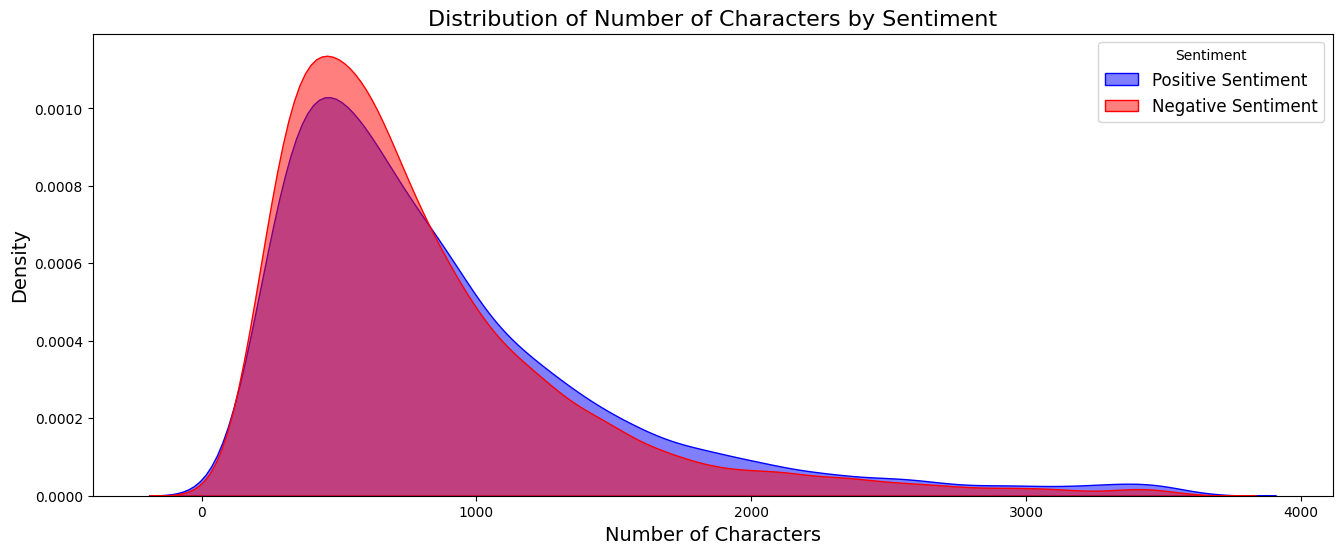

In [144]:
plt.figure(figsize=(16, 6))

# Plotting the KDE for positive sentiment
sb.kdeplot(df[df['sentiment'] == 'positive']['num_characters'], color='blue', label='Positive Sentiment', fill=True, alpha=0.5)

# Plotting the KDE for negative sentiment
sb.kdeplot(df[df['sentiment'] == 'negative']['num_characters'], color='red', label='Negative Sentiment', fill=True, alpha=0.5)

# Adding labels and title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Number of Characters by Sentiment', fontsize=16)
plt.legend(title='Sentiment', fontsize=12)

# Show the plot
plt.show()

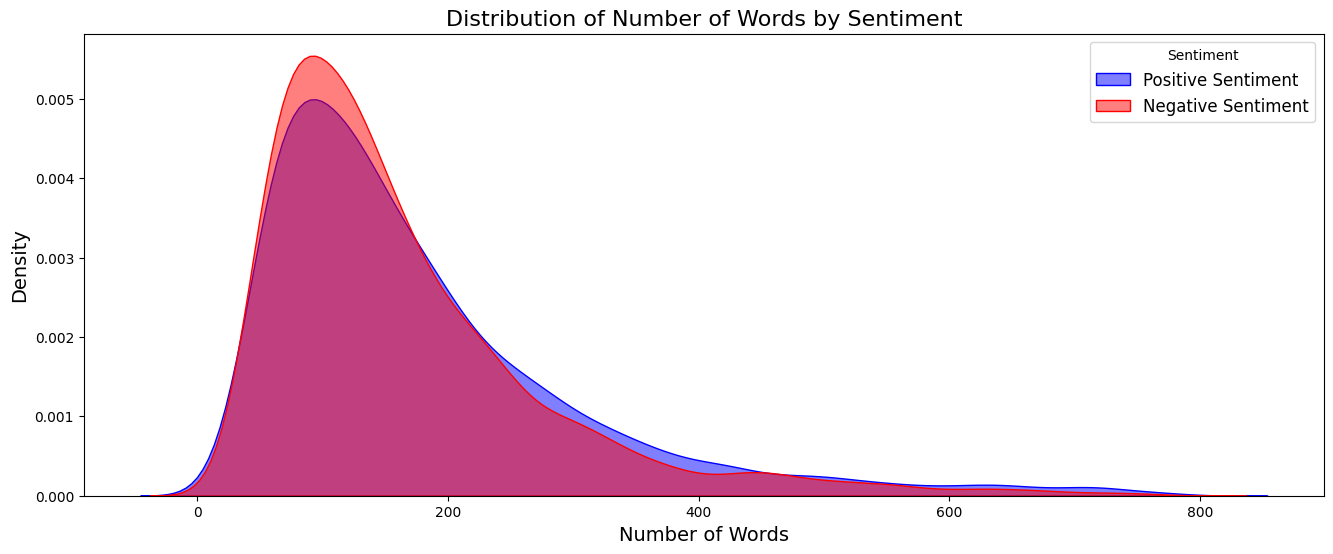

In [145]:
plt.figure(figsize=(16, 6))

# Plotting the KDE for positive sentiment
sb.kdeplot(df[df['sentiment'] == 'positive']['num_words'], color='blue', label='Positive Sentiment', fill=True, alpha=0.5)

# Plotting the KDE for negative sentiment
sb.kdeplot(df[df['sentiment'] == 'negative']['num_words'], color='red', label='Negative Sentiment', fill=True, alpha=0.5)

# Adding labels and title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Number of Words by Sentiment', fontsize=16)
plt.legend(title='Sentiment', fontsize=12)

# Show the plot
plt.show()

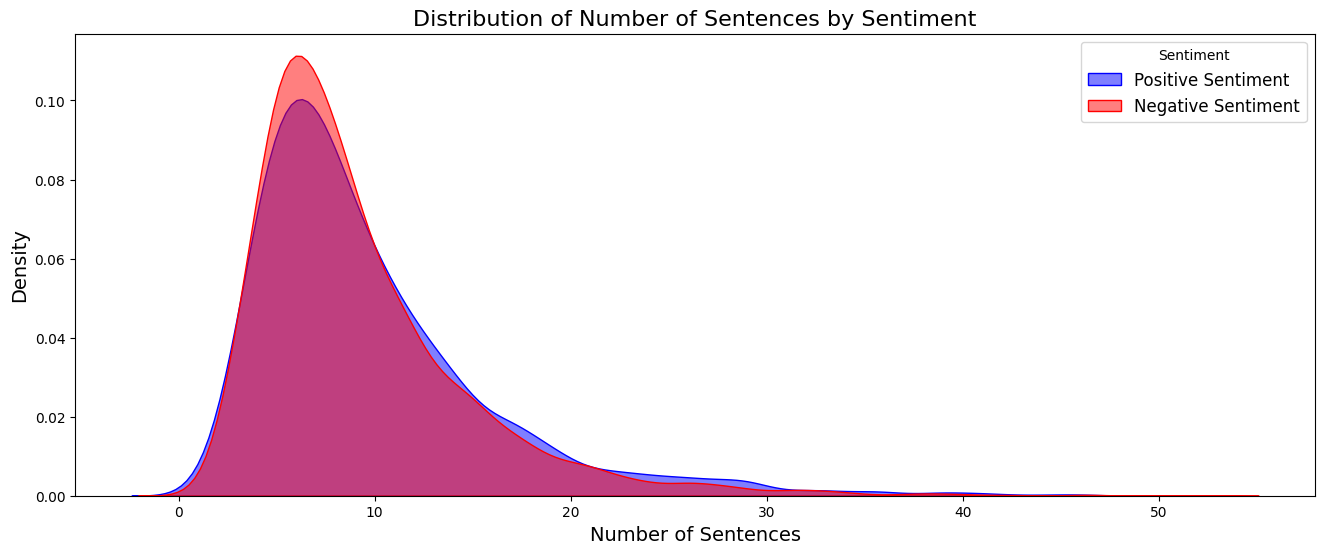

In [146]:
plt.figure(figsize=(16, 6))

# Plotting the KDE for positive sentiment
sb.kdeplot(df[df['sentiment'] == 'positive']['num_sentences'], color='blue', label='Positive Sentiment', fill=True, alpha=0.5)

# Plotting the KDE for negative sentiment
sb.kdeplot(df[df['sentiment'] == 'negative']['num_sentences'], color='red', label='Negative Sentiment', fill=True, alpha=0.5)

# Adding labels and title
plt.xlabel('Number of Sentences', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Number of Sentences by Sentiment', fontsize=16)
plt.legend(title='Sentiment', fontsize=12)

# Show the plot
plt.show()

 * **Key Observations:**
    * **Overlap**: The distributions for positive and negative sentiment are quite similar in shape and heavily overlap, implying that the length of a message does not vary drastically based on its sentiment.
    * **Negative Sentiment** Tends to Have a Higher Peak: The red (negative) distribution slightly peaks higher, suggesting that negative messages may have a slightly higher proportion at lower character counts than positive ones.
    * **Longer Messages**: After around 1000 characters, both distributions drop off, with very few messages longer than 2000 characters.
    

  * **In conclusion**, both positive and negative sentiments share a similar character length distribution, but negative sentiment tends to have a slightly higher density for shorter messages.

# Handling Emojis

In [ ]:
!pip install emoji
import emoji


In [ ]:
def demojize_text(text):
    return emoji.demojize(text)

In [ ]:
df.loc[:, 'clean_text'] = df['review_text'].apply(demojize_text)

In [ ]:
df.sample(5)

In [ ]:
df['trip_verified'] = np.where(df['review_text'].str.contains('Trip Verified', case=False, na=False), 'yes', 'no')

In [ ]:
df.sample(5)

# Lowercasing

In [ ]:
df['clean_text']=df['clean_text'].str.lower()

In [ ]:
df.sample(2)

# Dealing with chat words

In [ ]:
chat_words={
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BF": "Boy Friend",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "lol": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "4MY": "For My",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "R": "Are",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when. TFW internet slang often goes in a caption to an image.",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don’t care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing"

}

In [ ]:
def chat_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words:
            new_text.append(chat_words[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [ ]:
df['clean_text']=df['clean_text'].apply(chat_conversion)

# dealing with punctuation

In [ ]:
import string
string.punctuation

In [ ]:
exclude = string.punctuation

In [ ]:
def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

In [ ]:
df['clean_text']=df['clean_text'].apply(remove_punc)

In [ ]:
df.head(2)

# Tokenization

In [ ]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [ ]:
df['clean_text']=df['clean_text'].apply(lambda text: [token.text for token in nlp(text)])

In [ ]:
df.sample(5)

# Stop words Removal

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

In [ ]:
# Add custom words to the stopwords list
custom_words = ['checkmarkbutton', 'verified']
stop_words = set(stopwords.words('english'))
stop_words.update(custom_words)

In [ ]:
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

In [ ]:
df['clean_text']=df['clean_text'].apply(remove_stopwords)

In [ ]:
df.sample(5)

# Steming

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [ ]:
df['clean_text']=df['clean_text'].apply(lambda x: [stemmer.stem(word) for word in x])

In [ ]:
df.sample(5)

# removing special characters

In [ ]:
import re

def remove_special_characters(text):
    # Define a regex pattern to match special characters
    pattern = r'[^a-zA-Z0-9\s]'

    # Use re.sub() to replace special characters with an empty string
    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text

In [ ]:
df.sample(5)

In [ ]:
df['clean_text']=df['clean_text'].apply(lambda tokens: ' '.join(tokens))

In [ ]:
df.sample(5)

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
positive_wc = wc.generate(df[df['sentiment'] == 'positive']['clean_text'].str.cat(sep=" "))

In [ ]:
plt.figure(figsize=(16,6))
plt.imshow(positive_wc)

In [ ]:
negative_wc = wc.generate(df[df['sentiment'] == 'negative']['clean_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(negative_wc)

In [ ]:
positive_corpus = []
for text in df[df['sentiment'] == 'positive']['clean_text'].tolist():
    for t in text.split():
        positive_corpus.append(t)

In [ ]:
len(positive_corpus)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In [ ]:

most_common_words = Counter(positive_corpus).most_common(15)

# Convert the most common words to a DataFrame
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Set the figure size
plt.figure(figsize=(16, 6))

# Create a barplot, with colors scaled from highest to lowest frequency
colors = sb.color_palette("rocket", len(common_words_df))  # Using the 'viridis' palette
sb.barplot(x='Word', y='Frequency', data=common_words_df, palette=colors)

# Rotate x-axis labels for readability
plt.xticks(rotation='vertical')

# Add labels for each bar
for index, row in common_words_df.iterrows():
    plt.text(index, row.Frequency, round(row.Frequency, 2), color='black', ha="center")

# Show the plot
plt.show()

In [ ]:
negative_corpus = []
for text in df[df['sentiment'] == 'negative']['clean_text'].tolist():
    for t in text.split():
        negative_corpus.append(t)

In [ ]:
len(negative_corpus)

In [ ]:

most_common_word = Counter(negative_corpus).most_common(15)

# Convert the most common words to a DataFrame
common_words_df1 = pd.DataFrame(most_common_word, columns=['Word', 'Frequency'])

# Set the figure size
plt.figure(figsize=(16, 6))

# Create a barplot, with colors scaled from highest to lowest frequency
colors = sb.color_palette("rocket", len(common_words_df1))  # Using the 'viridis' palette
sb.barplot(x='Word', y='Frequency', data=common_words_df1, palette=colors)

# Rotate x-axis labels for readability
plt.xticks(rotation='vertical')

# Add labels for each bar
for index, row in common_words_df.iterrows():
    plt.text(index, row.Frequency, round(row.Frequency, 2), color='black', ha="center")

# Show the plot
plt.show()

In [ ]:
df.columns

In [ ]:
#performing encoding on recommended column yes as 1 no as 0
df['trip_verified'] = df['trip_verified'].map({'yes': 1, 'no': 0})


In [ ]:
df['recommended'] = df['recommended'].map({'yes': 1, 'no': 0})

In [ ]:
df['sentiment_encoded'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [193]:
df.sample(5)

,reviewer_names,review_date,review_text,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,...,wifi_&_connectivity,recommended,sentiment,sentiment_score,num_characters,num_words,num_sentences,clean_text,trip_verified,sentiment_encoded
21163,M Neale,2018-05-18,✅ Trip Verified | Atlanta to Los Angeles. Not...,Business,Business,Economy Class,Atlanta to Los Angeles,May 2018,3.0,2.0,...,2.0,0,positive,0.099167,319,64,5,trip atlanta lo angel pleasant experi part i...,1,1
32228,Tiffany Swan,2024-02-20,Not Verified | I'm on a business trip. Flight ...,Business,Business,Economy Class,San Jose to Los Angeles,February 2024,1.0,1.0,...,1.0,0,negative,-0.167857,293,61,5,busi trip flight got delay manag onsit help ...,0,0
30961,J Allemano,2015-08-29,"Cabin is ok, flight crew were nice but definit...",Boeing 737-800,Business,Economy Class,Toronto to Calgary,July 2015,2.0,1.0,...,3.0,0,positive,0.213651,1028,213,14,cabin ok flight crew nice definit profession s...,0,1
32510,J Buchanan,2023-06-26,Not Verified | This is by far the worst flyin...,Family Leisure,Family Leisure,Economy Class,New York to Tennessee,June 2023,3.0,1.0,...,1.0,0,negative,-0.145909,536,117,5,far worst fli experi ’ve ever displeasur exp...,0,0
12873,Graeme Wood,2015-10-24,London to Singapore with Singapore Airlines on...,A380,Family Leisure,Economy Class,LHR to SIN,September 2015,4.0,5.0,...,4.0,1,positive,0.260000,322,63,4,london singapor singapor airlin a380 love crew...,0,1


In [92]:
df.columns

Index(['reviewer_names', 'review_date', 'review_text', 'aircraft',
       'type_of_traveller', 'seat_type', 'route', 'date_flown', 'seat_comfort',
       'cabin_staff_service', 'food_&_beverages', 'inflight_entertainment',
       'ground_service', 'value_for_money', 'wifi_&_connectivity',
       'recommended', 'sentiment', 'sentiment_score', 'num_characters',
       'num_words', 'num_sentences', 'clean_text', 'trip_verified',
       'sentiment_encoded'],
      dtype='object')

In [96]:
numerics_columns=['seat_type','seat_comfort','cabin_staff_service','food_&_beverages','inflight_entertainment','ground_service','value_for_money','wifi_&_connectivity','trip_verified','recommended','sentiment_encoded']

In [97]:
cdf = df[numerics_columns].reset_index(drop=True)

In [98]:
df['seat_type'].value_counts()

,count
seat_type,
Economy Class,7188
Business Class,1540
Premium Economy,541
First Class,421


In [204]:
df = pd.get_dummies(df, columns=['seat_type'])

In [205]:
df.head(5)

,reviewer_names,review_date,review_text,aircraft,type_of_traveller,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,...,num_characters,num_words,num_sentences,clean_text,trip_verified,sentiment_encoded,seat_type_Business Class,seat_type_Economy Class,seat_type_First Class,seat_type_Premium Economy
10999,Rosalia Da Garcia,2017-03-27,✅ Verified Review | San Francisco to Singapor...,Boeing 777-300ER,Business,SFO to SIN via HKG,March 2017,5.0,4.0,4.0,...,798,158,10,review san francisco singapor via hong kong ...,0,1,True,False,False,False
34438,Brion kerry,2020-06-22,Not Verified | I’m sitting here in my middle ...,A321,Business,Los Angeles to New York,June 2020,1.0,1.0,1.0,...,641,130,7,’m sit middl seat flight nyc full plane want...,0,1,False,True,False,False
12821,M Backman,2016-02-10,Melbourne to Manchester via Singapore with Sin...,Solo Leisure,Solo Leisure,MEL to MAN via SIN,January 2016,5.0,5.0,5.0,...,368,67,5,melbourn manchest via singapor singapor airlin...,0,1,False,True,False,False
1155,David Ellis,2019-01-30,✅ Trip Verified | A380 boarding is always a ni...,A380,Couple Leisure,Johannesburg to London,January 2019,4.0,3.0,3.0,...,1242,238,14,trip a380 board alway nightmar complic occas...,1,1,False,False,True,False
8679,G Chong,2024-05-02,✅ Trip Verified | Plane was dated. There is on...,Solo Leisure,Solo Leisure,Hong Kong to Singapore,April 2024,1.0,1.0,3.0,...,1258,255,14,trip plane date one usb avail charg flight e...,1,1,True,False,False,False


In [206]:
df.rename(columns={'seat_type_Business Class': 'business_class', 'seat_type_Economy Class': 'economy_class','seat_type_First Class':'first_class','seat_type_Premium Economy':'premium_economy'}, inplace=True)

In [207]:
df.head(2)

,reviewer_names,review_date,review_text,aircraft,type_of_traveller,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,...,num_characters,num_words,num_sentences,clean_text,trip_verified,sentiment_encoded,business_class,economy_class,first_class,premium_economy
10999,Rosalia Da Garcia,2017-03-27,✅ Verified Review | San Francisco to Singapor...,Boeing 777-300ER,Business,SFO to SIN via HKG,March 2017,5.0,4.0,4.0,...,798,158,10,review san francisco singapor via hong kong ...,0,1,True,False,False,False
34438,Brion kerry,2020-06-22,Not Verified | I’m sitting here in my middle ...,A321,Business,Los Angeles to New York,June 2020,1.0,1.0,1.0,...,641,130,7,’m sit middl seat flight nyc full plane want...,0,1,False,True,False,False


In [208]:
df[['business_class', 'economy_class', 'first_class', 'premium_economy']] = df[['business_class', 'economy_class', 'first_class', 'premium_economy']].astype(int)

In [209]:
df.head(5)

,reviewer_names,review_date,review_text,aircraft,type_of_traveller,route,date_flown,seat_comfort,cabin_staff_service,food_&_beverages,...,num_characters,num_words,num_sentences,clean_text,trip_verified,sentiment_encoded,business_class,economy_class,first_class,premium_economy
10999,Rosalia Da Garcia,2017-03-27,✅ Verified Review | San Francisco to Singapor...,Boeing 777-300ER,Business,SFO to SIN via HKG,March 2017,5.0,4.0,4.0,...,798,158,10,review san francisco singapor via hong kong ...,0,1,1,0,0,0
34438,Brion kerry,2020-06-22,Not Verified | I’m sitting here in my middle ...,A321,Business,Los Angeles to New York,June 2020,1.0,1.0,1.0,...,641,130,7,’m sit middl seat flight nyc full plane want...,0,1,0,1,0,0
12821,M Backman,2016-02-10,Melbourne to Manchester via Singapore with Sin...,Solo Leisure,Solo Leisure,MEL to MAN via SIN,January 2016,5.0,5.0,5.0,...,368,67,5,melbourn manchest via singapor singapor airlin...,0,1,0,1,0,0
1155,David Ellis,2019-01-30,✅ Trip Verified | A380 boarding is always a ni...,A380,Couple Leisure,Johannesburg to London,January 2019,4.0,3.0,3.0,...,1242,238,14,trip a380 board alway nightmar complic occas...,1,1,0,0,1,0
8679,G Chong,2024-05-02,✅ Trip Verified | Plane was dated. There is on...,Solo Leisure,Solo Leisure,Hong Kong to Singapore,April 2024,1.0,1.0,3.0,...,1258,255,14,trip plane date one usb avail charg flight e...,1,1,1,0,0,0


In [210]:
df.columns

Index(['reviewer_names', 'review_date', 'review_text', 'aircraft',
       'type_of_traveller', 'route', 'date_flown', 'seat_comfort',
       'cabin_staff_service', 'food_&_beverages', 'inflight_entertainment',
       'ground_service', 'value_for_money', 'wifi_&_connectivity',
       'recommended', 'sentiment', 'sentiment_score', 'num_characters',
       'num_words', 'num_sentences', 'clean_text', 'trip_verified',
       'sentiment_encoded', 'business_class', 'economy_class', 'first_class',
       'premium_economy'],
      dtype='object')

In [226]:
sub_df=df.copy()
sub_df = sub_df.drop(columns=['reviewer_names', 'review_date', 'review_text', 'aircraft','route', 'date_flown','num_characters',
       'num_words', 'num_sentences'])

In [227]:
sub_df.head(5)

,type_of_traveller,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,sentiment_score,clean_text,trip_verified,sentiment_encoded,business_class,economy_class,first_class,premium_economy
10999,Business,5.0,4.0,4.0,5.0,5.0,4.0,5.0,1,positive,0.285641,review san francisco singapor via hong kong ...,0,1,1,0,0,0
34438,Business,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,positive,0.204388,’m sit middl seat flight nyc full plane want...,0,1,0,1,0,0
12821,Solo Leisure,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1,positive,0.062500,melbourn manchest via singapor singapor airlin...,0,1,0,1,0,0
1155,Couple Leisure,4.0,3.0,3.0,3.0,3.0,3.0,3.0,1,positive,0.131731,trip a380 board alway nightmar complic occas...,1,1,0,0,1,0
8679,Solo Leisure,1.0,1.0,3.0,2.0,1.0,1.0,1.0,0,positive,0.122556,trip plane date one usb avail charg flight e...,1,1,1,0,0,0


In [228]:
sub_df = pd.get_dummies(sub_df, columns=['type_of_traveller'])

In [229]:
sub_df.head(5)

,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,sentiment_score,...,trip_verified,sentiment_encoded,business_class,economy_class,first_class,premium_economy,type_of_traveller_Business,type_of_traveller_Couple Leisure,type_of_traveller_Family Leisure,type_of_traveller_Solo Leisure
10999,5.0,4.0,4.0,5.0,5.0,4.0,5.0,1,positive,0.285641,...,0,1,1,0,0,0,True,False,False,False
34438,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,positive,0.204388,...,0,1,0,1,0,0,True,False,False,False
12821,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1,positive,0.062500,...,0,1,0,1,0,0,False,False,False,True
1155,4.0,3.0,3.0,3.0,3.0,3.0,3.0,1,positive,0.131731,...,1,1,0,0,1,0,False,True,False,False
8679,1.0,1.0,3.0,2.0,1.0,1.0,1.0,0,positive,0.122556,...,1,1,1,0,0,0,False,False,False,True


In [231]:
sub_df.rename(columns={'type_of_traveller_Couple Leisure': 'couple_traveller',
                         'type_of_traveller_Family Leisure': 'family',
                         'type_of_traveller_Solo Leisure': 'solo_traveller',
                         'type_of_traveller_Business':'business_traveller'}, inplace=True)

In [232]:
sub_df[['couple_traveller', 'family', 'solo_traveller','business_traveller']] = sub_df[['couple_traveller', 'family', 'solo_traveller','business_traveller']].astype(int)

In [259]:
sub_df[['seat_comfort', 'cabin_staff_service', 'food_&_beverages',
       'inflight_entertainment', 'ground_service', 'value_for_money',
       'wifi_&_connectivity', 'recommended',]] = sub_df[['seat_comfort', 'cabin_staff_service', 'food_&_beverages',
       'inflight_entertainment', 'ground_service', 'value_for_money',
       'wifi_&_connectivity', 'recommended',]].astype(int)

In [233]:
sub_df.head(5)

,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,ground_service,value_for_money,wifi_&_connectivity,recommended,sentiment,sentiment_score,...,trip_verified,sentiment_encoded,business_class,economy_class,first_class,premium_economy,business_traveller,couple_traveller,family,solo_traveller
10999,5.0,4.0,4.0,5.0,5.0,4.0,5.0,1,positive,0.285641,...,0,1,1,0,0,0,1,0,0,0
34438,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,positive,0.204388,...,0,1,0,1,0,0,1,0,0,0
12821,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1,positive,0.062500,...,0,1,0,1,0,0,0,0,0,1
1155,4.0,3.0,3.0,3.0,3.0,3.0,3.0,1,positive,0.131731,...,1,1,0,0,1,0,0,1,0,0
8679,1.0,1.0,3.0,2.0,1.0,1.0,1.0,0,positive,0.122556,...,1,1,1,0,0,0,0,0,0,1


In [234]:
sub_df.columns

Index(['seat_comfort', 'cabin_staff_service', 'food_&_beverages',
       'inflight_entertainment', 'ground_service', 'value_for_money',
       'wifi_&_connectivity', 'recommended', 'sentiment', 'sentiment_score',
       'clean_text', 'trip_verified', 'sentiment_encoded', 'business_class',
       'economy_class', 'first_class', 'premium_economy', 'business_traveller',
       'couple_traveller', 'family', 'solo_traveller'],
      dtype='object')

# LR

In [240]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [241]:
tfidf=TfidfVectorizer()

In [246]:
X=tfidf.fit_transform(sub_df['clean_text']).toarray()

In [247]:
X.shape

(9690, 17198)

In [245]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])


In [248]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [250]:
logreg = LogisticRegression()

In [251]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [252]:
y_pred = logreg.predict(X_test)

In [253]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8225


In [254]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       947
           1       0.87      0.77      0.82       991

    accuracy                           0.82      1938
   macro avg       0.83      0.82      0.82      1938
weighted avg       0.83      0.82      0.82      1938



#Linear Regression

In [260]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9690 entries, 10999 to 13377
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   seat_comfort            9690 non-null   int64  
 1   cabin_staff_service     9690 non-null   int64  
 2   food_&_beverages        9690 non-null   int64  
 3   inflight_entertainment  9690 non-null   int64  
 4   ground_service          9690 non-null   int64  
 5   value_for_money         9690 non-null   int64  
 6   wifi_&_connectivity     9690 non-null   int64  
 7   recommended             9690 non-null   int64  
 8   sentiment               9690 non-null   object 
 9   sentiment_score         9690 non-null   float64
 10  clean_text              9690 non-null   object 
 11  trip_verified           9690 non-null   int64  
 12  sentiment_encoded       9690 non-null   int64  
 13  business_class          9690 non-null   int64  
 14  economy_class           9690 non-null   

In [262]:
X1=sub_df.drop(columns=['clean_text','sentiment','sentiment_score'])

In [263]:
X1

,seat_comfort,cabin_staff_service,food_&_beverages,inflight_entertainment,ground_service,value_for_money,wifi_&_connectivity,recommended,trip_verified,sentiment_encoded,business_class,economy_class,first_class,premium_economy,business_traveller,couple_traveller,family,solo_traveller
10999,5,4,4,5,5,4,5,1,0,1,1,0,0,0,1,0,0,0
34438,1,1,1,1,1,1,1,0,0,1,0,1,0,0,1,0,0,0
12821,5,5,5,5,5,5,5,1,0,1,0,1,0,0,0,0,0,1
1155,4,3,3,3,3,3,3,1,1,1,0,0,1,0,0,1,0,0
8679,1,1,3,2,1,1,1,0,1,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35395,1,3,2,2,1,2,1,0,1,0,0,1,0,0,0,0,0,1
4843,1,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,1,0
26569,1,1,1,2,1,1,1,0,0,0,0,1,0,0,0,0,0,1
32912,2,5,5,5,4,1,4,0,1,0,0,1,0,0,0,0,0,1


In [268]:
y1=sub_df['sentiment_score']

In [269]:
y1

,sentiment_score
10999,0.285641
34438,0.204388
12821,0.062500
1155,0.131731
8679,0.122556
...,...
35395,-0.141980
4843,-0.181746
26569,-0.350000
32912,-0.048810


In [270]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=2)


In [271]:
X1_train.shape


(7752, 18)

In [272]:
from sklearn.linear_model import LinearRegression

In [273]:
lr=LinearRegression()

In [274]:
lr.fit(X1_test,y1_test)


LinearRegression()

In [275]:
lr.predict(X1_test.iloc[1].values.reshape(1, -1))

array([-0.14229319])

In [277]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [278]:
y1_pred=lr.predict(X1_test)


In [280]:
print('R2_score',r2_score(y1_test,y1_pred))

R2_score 0.6778472191586473


In [282]:
pip install dominance-analysis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.2 MB/s eta 0:00:00
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.4.3
    Uninstalling bokeh-3.4.3:
      Successfully uninstalled bokeh-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
holoviews 1.19.1 requires bokeh>=3.1, but you have bokeh 2.4.3 which is incompatible.
panel 1.4.5 requires bokeh<3.5.0,>=3.4.0, but you have bokeh 2.4.3 which is incompatible.


In [290]:
df1=sub_df.drop(columns=['clean_text','sentiment','sentiment_encoded'])

In [291]:
from dominance_analysis import Dominance
dataset=df1
dominance_regression=Dominance(data=dataset,target='sentiment_score',objective=1)

Selecting 15 Best Predictors for the Model
Selected Predictors :  ['seat_comfort', 'cabin_staff_service', 'food_&_beverages', 'inflight_entertainment', 'ground_service', 'value_for_money', 'wifi_&_connectivity', 'recommended', 'trip_verified', 'business_class', 'economy_class', 'first_class', 'business_traveller', 'family', 'solo_traveller']

********************  R-Squared of Complete Model :  ********************
R Squared : 0.4731767745461587



In [292]:
incr_variable_rsquare=dominance_regression.incremental_rsquare()

Selecting 15 Best Predictors for the Model
Selected Predictors :  ['seat_comfort', 'cabin_staff_service', 'food_&_beverages', 'inflight_entertainment', 'ground_service', 'value_for_money', 'wifi_&_connectivity', 'recommended', 'trip_verified', 'business_class', 'economy_class', 'first_class', 'business_traveller', 'family', 'solo_traveller']

Creating models for 32767 possible combinations of 15 features :


100%|██████████| 15/15 [11:24<00:00, 45.63s/it]


#########################  Model Training Done!!!!!  #########################

#########################  Calculating Variable Dominances  #########################


100%|██████████| 14/14 [05:08<00:00, 22.06s/it]

#########################  Variable Dominance Calculation Done!!!!!  #########################



In [293]:
dominance_regression.dominance_stats()

,Interactional Dominance,Individual Dominance,Average Partial Dominance,Total Dominance,Percentage Relative Importance
recommended,0.022193,0.42797,0.077366,0.097062,20.512798
wifi_&_connectivity,0.002598,0.404107,0.054908,0.074701,15.787037
ground_service,0.003237,0.349266,0.042965,0.060736,12.835873
food_&_beverages,0.002642,0.33894,0.036908,0.054759,11.572609
seat_comfort,0.00121,0.33217,0.033727,0.051455,10.874433
cabin_staff_service,0.001242,0.307009,0.030830,0.047269,9.989817
inflight_entertainment,0.0,0.283249,0.023438,0.039196,8.283679
value_for_money,0.000155,0.25979,0.021516,0.035977,7.603273
economy_class,0.00008,0.038566,0.002554,0.00479,1.012263
business_class,0.000011,0.040661,0.002332,0.004732,1.000144


#  Use Case 1 Sentiment Analysis by Route

To improve customer satisfaction on different routes, it’s essential to understand which routes generate the most positive and negative feedback from passengers. By analyzing the average sentiment score by route, we aim to identify the top 10 routes with the highest sentiment scores, which likely reflect well-managed services and passenger satisfaction, as well as the 10 routes with the lowest sentiment scores, which may need targeted improvements. Which routes show the highest and lowest sentiment, and how can these insights guide service adjustments or resource allocation

In [307]:
sentiment_by_route = df.groupby("route")["sentiment_score"].mean().reset_index()
top_10_routes = sentiment_by_route.sort_values(by="sentiment_score", ascending=False).head(10)
least_10_routes = sentiment_by_route.sort_values(by="sentiment_score", ascending=True).head(10)

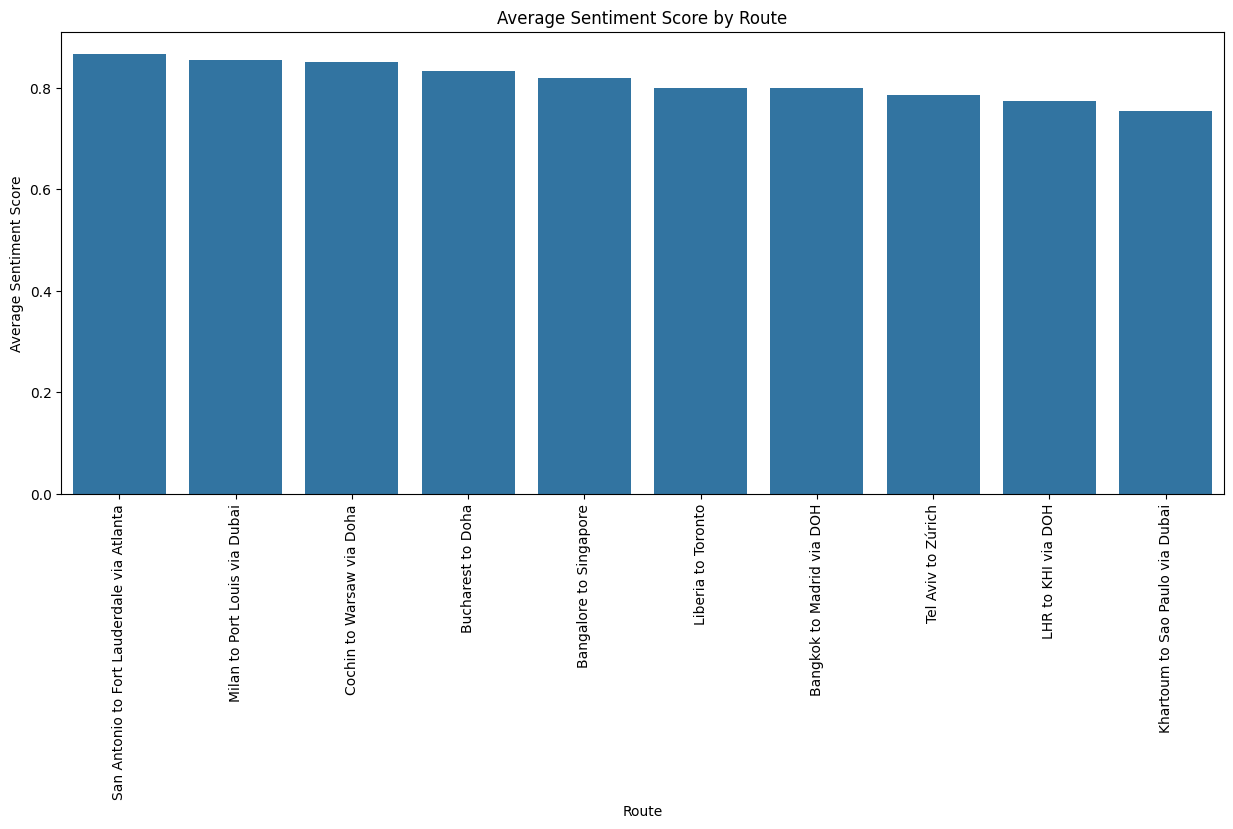

In [375]:

plt.figure(figsize=(15, 6))
sns.barplot(x="route", y="sentiment_score", data=top_10_routes)
plt.title("Average Sentiment Score by Route")
plt.xlabel("Route")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=90)
plt.show()


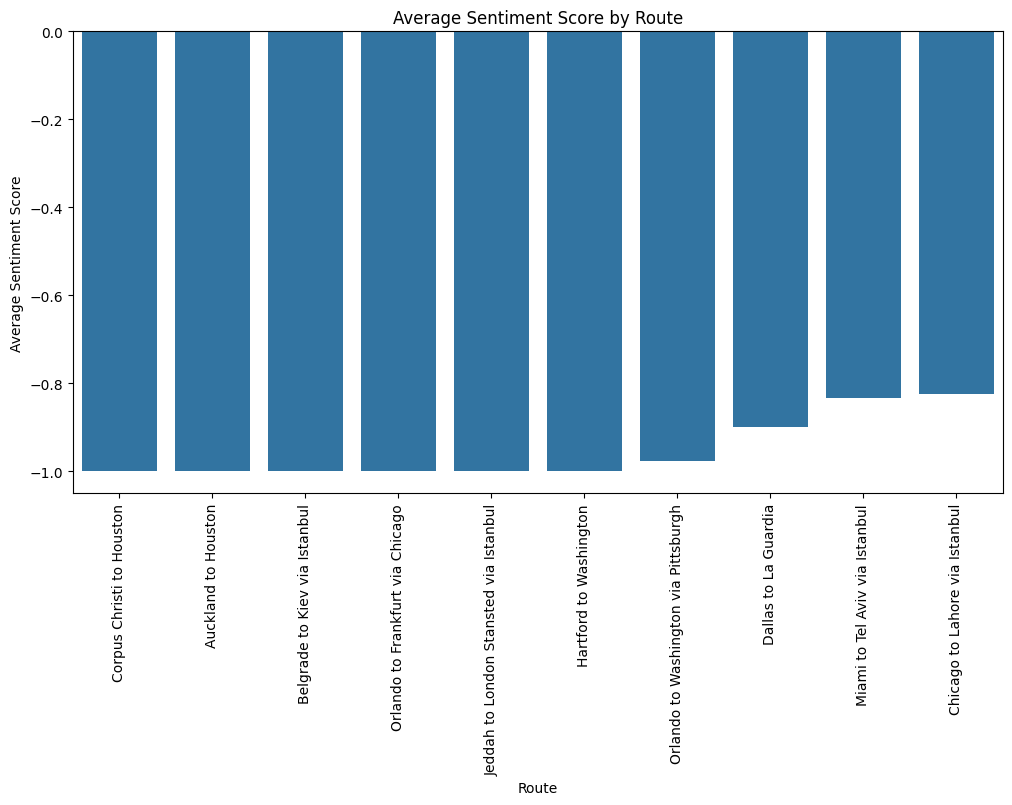

In [320]:

plt.figure(figsize=(12, 6))
sns.barplot(x="route", y="sentiment_score", data=least_10_routes)
plt.title("Average Sentiment Score by Route")
plt.xlabel("Route")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=90)
plt.show()


### Explanation and Analysis

In this analysis, we calculate the average sentiment score for each route. Sentiment scores, which reflect passengers' positive or negative feedback, can help us identify routes that may benefit from further investment in customer service and those that are already excelling in customer satisfaction.

#### Key Findings

1. **Top 10 Routes with Highest Sentiment Scores**:
   - These routes have the highest average sentiment scores, suggesting that passengers are generally satisfied with their experiences. Possible reasons could include efficient cabin service, comfortable seating, timely departures, or desirable amenities.
   - By analyzing the successful aspects of these routes, other routes can adopt similar strategies or practices to enhance customer experience.

2. **Bottom 10 Routes with Lowest Sentiment Scores**:
   - These routes show the lowest average sentiment scores, indicating potential areas of improvement. Passengers on these routes may have experienced service issues, discomfort, or delays, leading to negative sentiment.
   - Targeting these routes for service improvements, such as enhancing seating comfort, improving inflight entertainment, or addressing staff efficiency, could help boost overall satisfaction.

3. **Comparative Route Analysis**:
   - The comparison of sentiment scores across routes can inform strategic decisions on where to allocate resources, such as investing in staff training, upgrading amenities, or improving scheduling and timeliness on specific routes.

#### Recommended Actions

1. **Enhance Services on Low-Sentiment Routes**:
   - Allocate resources to improve service aspects on routes with low sentiment scores, focusing on common issues like delayed flights, seating discomfort, or lack of amenities.

2. **Leverage High-Sentiment Routes as Case Studies**:
   - Use the top-performing routes as benchmarks to understand what’s working well. Interview staff, gather customer feedback, and assess amenities on these routes to replicate successful practices across other routes.

3. **Develop Route-Specific Improvement Plans**:
   - For each low-sentiment route, design a tailored improvement plan based on known issues. For instance, routes with long-haul flights may benefit from enhanced inflight entertainment, while shorter routes may need faster check-in processes.

4. **Monitor Changes Over Time**:
   - Implement service enhancements and track sentiment scores over time to gauge if changes are having the desired impact on passenger satisfaction.


---

#### Suggested Next Steps

1. **Gather Detailed Feedback on Low-Sentiment Routes**:
   - Use follow-up surveys or targeted feedback requests from passengers on the lowest-scoring routes to pinpoint specific areas of dissatisfaction.

2. **Allocate Resources Strategically**:
   - Direct budget and staff training efforts to address commonly reported issues on low-sentiment routes, while using the successful practices of high-sentiment routes as a guide.

3. **Run Pilot Improvements and Track Changes**:
   - Implement changes on a trial basis on low-sentiment routes and monitor sentiment score shifts to validate the impact of enhancements.

---

By focusing on these insights, we can make data-driven decisions to improve passenger satisfaction, reduce complaints, and optimize service quality on routes where it’s needed most.

# Use Case 2 Sentiment Analysis by Type of Traveller

Different types of travelers, such as solo travelers, families, and business passengers, may have distinct preferences and experiences. By analyzing sentiment scores across various traveler types,suggest which groups have more positive or negative sentiments about their travel experience. Which traveler types exhibit the highest and lowest average sentiment scores, and what does this indicate about areas for improvement or targeted service enhancements for specific groups?

---


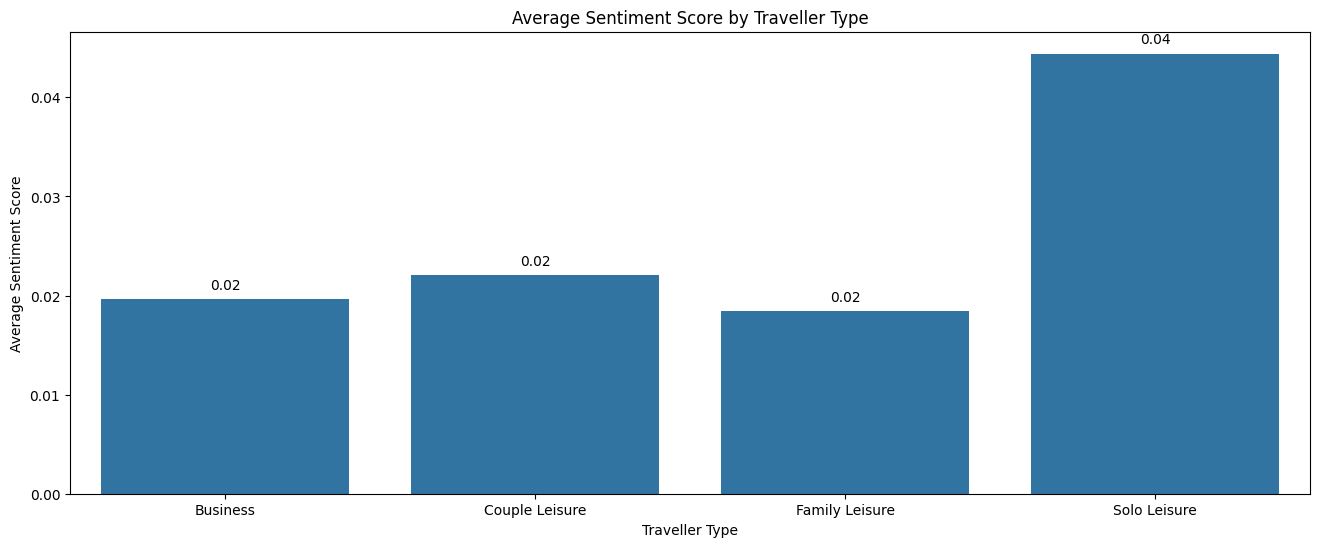

In [374]:
# @title Sentiment Analysis by Type of Traveller
# Average sentiment by traveller type
sentiment_by_traveller = df.groupby("type_of_traveller")["sentiment_score"].mean().reset_index()

# Plotting
plt.figure(figsize=(16, 6))
sns.barplot(x="type_of_traveller", y="sentiment_score", data=sentiment_by_traveller)
plt.title("Average Sentiment Score by Traveller Type")
plt.xlabel("Traveller Type")
plt.ylabel("Average Sentiment Score")
for index, row in sentiment_by_traveller.iterrows():
    plt.text(index, row["sentiment_score"]+0.001, round(row["sentiment_score"], 2),
             color='black', ha="center")
plt.show()


### Explanation and Analysis

In this analysis, we calculate and visualize the average sentiment score for each traveler type. Sentiment scores provide insights into how positively or negatively travelers feel about their overall experience, giving a more nuanced understanding than just star ratings alone. The grouping by traveler type helps identify specific needs and areas of dissatisfaction for targeted improvements.

#### Key Findings

1. **Traveler Types with High Average Sentiment**:
   - Travelers with higher sentiment scores are generally more satisfied. Solo Leisure have a high sentiment score, indicate that they appreciate efficient service, promptness, or comfortable seating.

2. **Traveler Types with Low Average Sentiment**:
   - in our case Except Solo Leisure all three classes have low average sentiment
   - Addressing these needs could involve implementing family-friendly policies, improving seating flexibility, or enhancing meal options.

#### Recommended Actions

1. **Enhance High-Sentiment Services for Loyal Segments**:
   - For traveler types with high sentiment scores, ensure consistent delivery of services that resonate with them. This could mean enhancing business-class facilities for business travelers or quick check-ins for solo travelers.

2. **Focus Improvements on Low-Sentiment Segments**:
   - Identify the areas where lower-sentiment traveler groups find dissatisfaction. Implement targeted improvements, such as more family-friendly seating arrangements, or amenities tailored to solo travelers.

3. **Design Targeted Marketing Campaigns**:
   - Using this sentiment analysis, develop campaigns to address specific traveler needs, such as “Family-Friendly Flights” or “Business Traveler Benefits.”

---

### Visual Insights

The bar plot of average sentiment scores by traveler type provides a clear comparison of sentiment levels across groups. The visualization allows us to easily identify traveler types with particularly high or low sentiment, helping guide targeted action.

#### Suggested Next Steps

1. **Collect Feedback on Specific Pain Points**:
   - Use targeted surveys for each traveler type to better understand what influences their sentiment scores, allowing for more specific service adjustments.

2. **Monitor Changes in Sentiment Over Time**:
   - After implementing targeted improvements, track sentiment scores across traveler types to assess if changes lead to improved satisfaction.

---

By tailoring services to the specific needs of traveler types, this approach can help foster more positive experiences, improve overall sentiment, and enhance passenger loyalty.

# Use Case 3 Service Consistency Across Routes

To ensure a high level of service satisfaction, consistency across different routes is crucial. When service experiences are inconsistent, passengers may feel uncertain about what to expect, potentially impacting their loyalty. which routes show the highest inconsistency in service, and where do we see the most consistency? What strategies could be implemented to improve service consistency on routes with high variability, especially for seat comfort?

In [328]:
service_consistency = df.groupby("route")[["seat_comfort", "cabin_staff_service", "inflight_entertainment"]].std()
top_10_service_consistency = service_consistency.sort_values(by="seat_comfort", ascending=False).head(10)
least_10_service_consistency = service_consistency.sort_values(by="seat_comfort", ascending=True).head(20)

<Figure size 1100x1500 with 0 Axes>

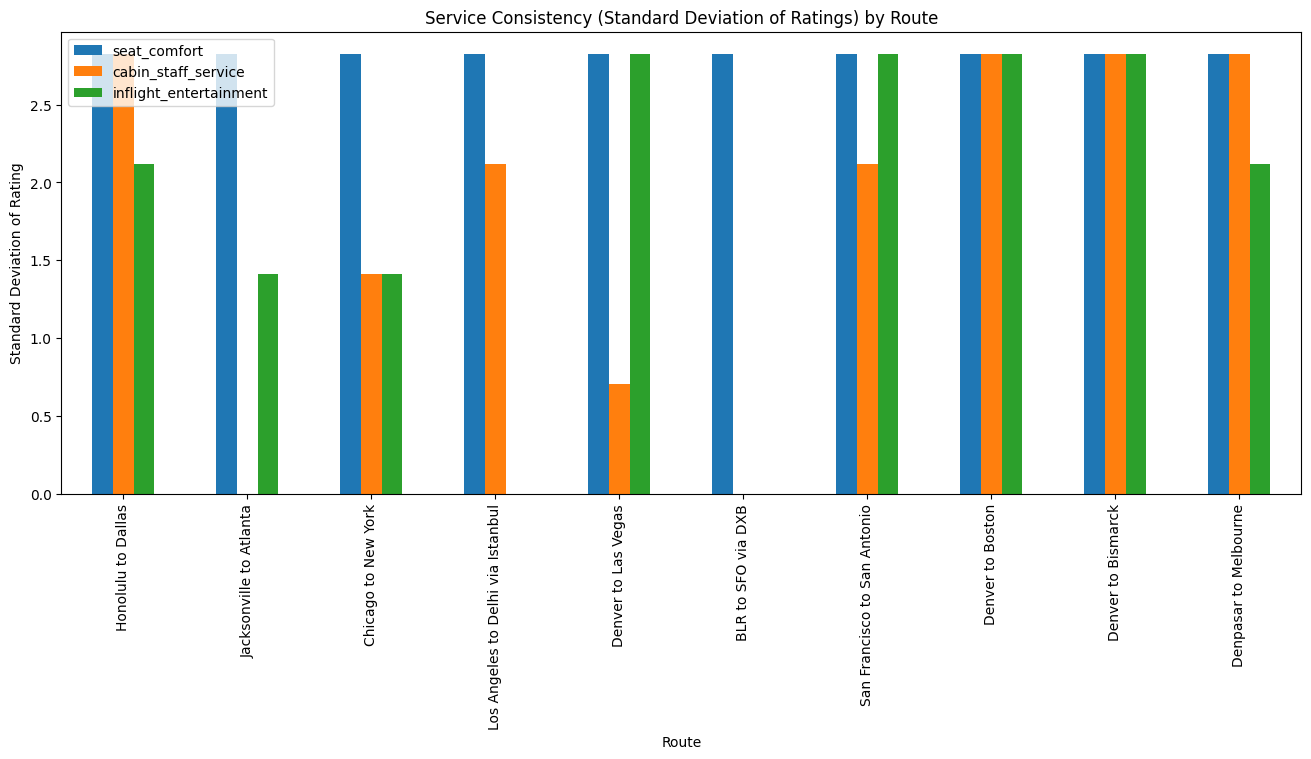

In [372]:
# @title High Service Consistency by Route

# Plotting
plt.figure(figsize=(11, 15))
top_10_service_consistency.plot(kind='bar', figsize=(16, 6))
plt.title("Service Consistency (Standard Deviation of Ratings) by Route")
plt.ylabel("Standard Deviation of Rating")
plt.xlabel("Route")
plt.show()

<Figure size 1600x1500 with 0 Axes>

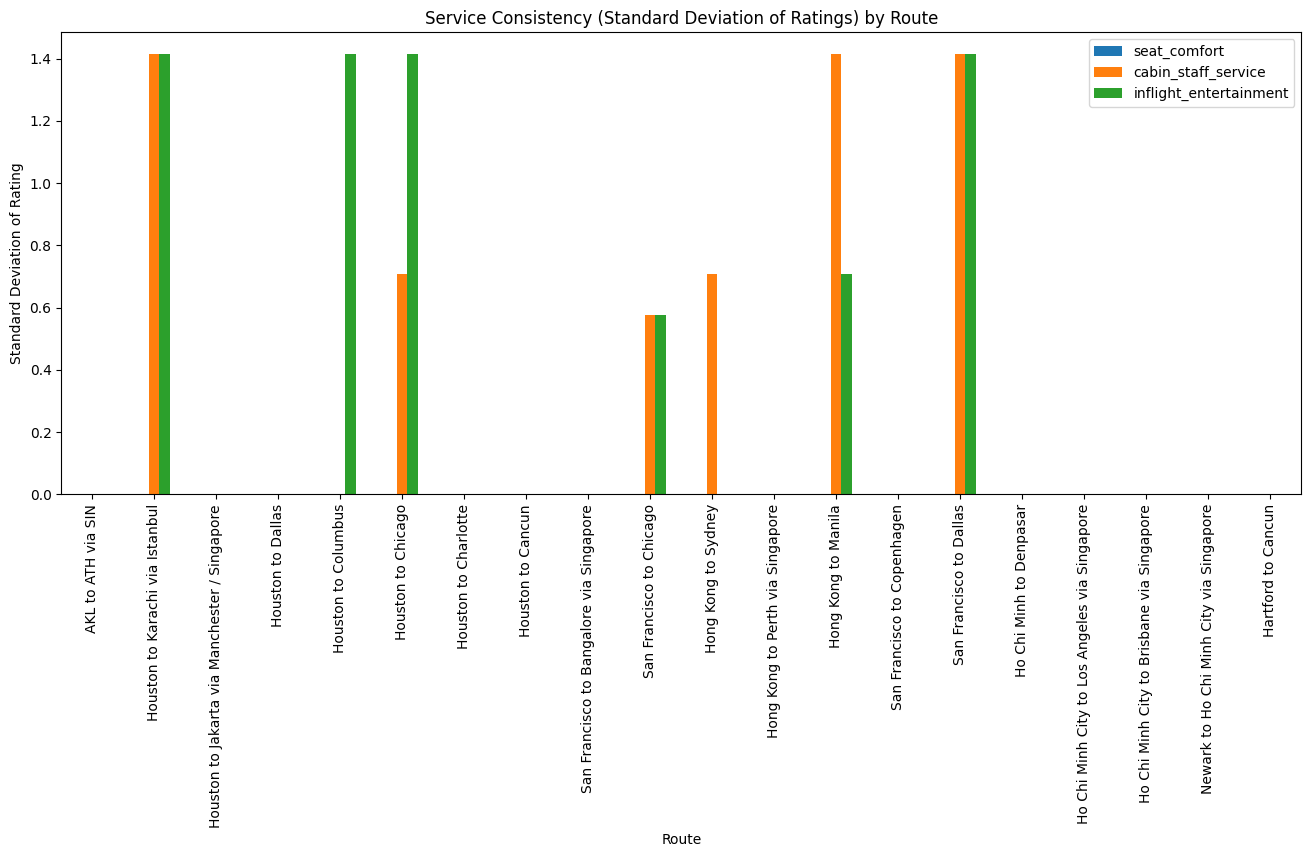

In [371]:
# @title Least Service Consistency by Route

plt.figure(figsize=(16, 15))
least_10_service_consistency.plot(kind='bar', figsize=(16, 6))
plt.title("Service Consistency (Standard Deviation of Ratings) by Route")
plt.ylabel("Standard Deviation of Rating")
plt.xlabel("Route")
plt.show()

### Explanation and Analysis

This analysis examines the variability (standard deviation) in ratings for three key service areas—seat comfort, cabin staff service, and inflight entertainment—across different routes. High variability (i.e., a higher standard deviation) indicates that passengers experience inconsistent service levels, while lower variability shows that the service is more predictable and uniform.

#### Key Findings

1. **Top 10 Routes with High Inconsistency in Seat Comfort**:
   - Routes with the highest standard deviation in seat comfort ratings exhibit significant differences in passenger experience. For instance, on some flights, passengers may find seats very comfortable, while on others, they report dissatisfaction.
   - Such variability could be due to factors like differences in aircraft types, inconsistent seat maintenance, or uneven distribution of seating classes.

2. **Top 20 Routes with Consistent Seat Comfort**:
   - Routes with the lowest standard deviation in seat comfort ratings show consistent service delivery in this area, suggesting a more reliable experience for passengers.
   - These routes can serve as benchmarks, highlighting what’s working well that could be replicated on more variable routes.

3. **Implications for Cabin Staff Service and Inflight Entertainment**:
   - Inconsistent ratings in cabin staff service might be due to varied staffing levels, different staff training levels, or fluctuating workloads on specific routes.
   - For inflight entertainment, inconsistency might stem from differences in equipment quality or content availability across aircraft.

#### Recommended Actions

1. **Standardize Seat Comfort on High-Variability Routes**:
   - To reduce variability in seat comfort, standardizing seat types and maintenance schedules across aircraft on these routes could help create a more uniform passenger experience.

2. **Ensure Consistent Cabin Staff Service**:
   - Routes with high variability in cabin staff service ratings might benefit from standardized crew training programs and setting service benchmarks, ensuring passengers have a reliably positive experience regardless of the crew.

3. **Enhance Inflight Entertainment Consistency**:
   - For routes with inconsistent inflight entertainment experiences, establishing a minimum standard for equipment and content availability can help manage passenger expectations.

4. **Benchmarking and Best Practice Sharing**:
   - Routes with high consistency ratings in seat comfort, cabin staff service, and inflight entertainment can be analyzed for best practices that may be replicated on other routes.

#### Visual Insights

Plotting the standard deviation of ratings for each service area by route could help visually identify outliers and routes with high variability. Highlighting these routes can bring attention to specific areas that need improvement.

---

### Suggested Next Steps

1. **Survey Passengers on High-Variability Routes**:
   - Gather feedback from passengers on routes with high service variability to identify specific pain points and potential improvements.

2. **Implement Pilot Programs on Key Routes**:
   - Test service standardization initiatives on a few routes with high variability to observe whether they improve consistency in ratings.

3. **Review Results After Implementation**:
   - Re-evaluate service consistency across routes after implementing these changes to assess the impact on passenger satisfaction.

---

By targeting routes with high variability, this approach helps ensure a stable and reliable service experience for passengers across all routes, enhancing satisfaction and brand loyalty.

# Use Case 4 Service Quality by Traveller Type

To enhance customer experience and optimize service delivery, it’s important to understand how different types of travelers perceive various service aspects, such as seat comfort, cabin staff service, and ground service. This information can help tailor improvements to meet specific needs. Given the average ratings by traveler type, which types of travelers appear least satisfied in each service area? What targeted enhancements could be prioritized for these traveler groups to maximize their satisfaction and loyalty?

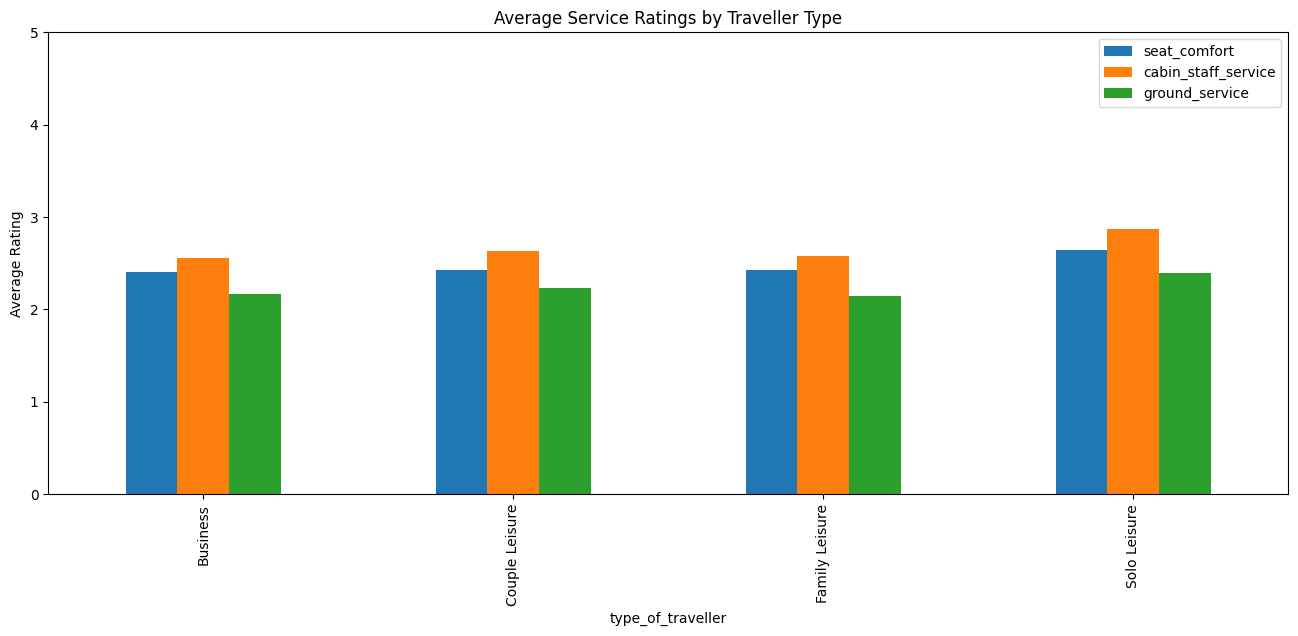

In [369]:
# Average ratings by traveller type
service_by_traveller = df.groupby("type_of_traveller")[["seat_comfort", "cabin_staff_service", "ground_service"]].mean() # Changed tuple to list

# Plotting
service_by_traveller.plot(kind='bar', figsize=(16, 6))
plt.title("Average Service Ratings by Traveller Type")
plt.ylim(0, 5)
plt.ylabel("Average Rating")
plt.show()

### Explanation and Analysis

The analysis begins by grouping traveler types to compare their average ratings across three key service dimensions: seat comfort, cabin staff service, and ground service. The findings can inform where service improvements would have the most impact based on the needs of different traveler categories (e.g., business, leisure, family travelers).

#### Key Findings

1. **Average Ratings by Traveler Type**:
   - **Seat Comfort**: Certain traveler types, such as business travelers, may have higher expectations for seat comfort due to frequent travel or longer flight durations. If business travelers rate seat comfort lower than other groups, investment in enhanced seating options or upgrades on routes popular with business travelers could be beneficial.
   - **Cabin Staff Service**: Leisure or family travelers may prioritize cabin staff service more heavily, as they might be traveling with children or for special occasions, thus valuing personalized attention. If these groups rate cabin staff service lower, improvements such as staff training focused on family-friendly service or added assistance for young passengers could enhance satisfaction.
   - **Ground Service**: Certain travelers, like solo or budget-conscious travelers, may rely more on efficient ground services to ease their travel experience. If their ratings for ground service are below average, streamlining check-in, baggage handling, and other ground services could make their experience smoother and more enjoyable.

2. **Targeted Improvements for Low-Rated Service Areas**:
   - **For Business Travelers**: If seat comfort ratings are low, enhancements like ergonomic seating options, priority boarding, or designated business traveler zones could improve their experience.
   - **For Leisure/Family Travelers**: Low cabin staff service ratings might indicate a need for more attentive service, family assistance programs, or child-friendly amenities.
   - **For Budget/Solo Travelers**: If ground service ratings are low, this group may benefit from faster processing times, self-service kiosks, or budget-friendly add-ons.

3. **Visual Insights**:
   - The bar chart plotting average ratings by traveler type visually emphasizes differences in service ratings, making it easy to identify where each traveler group experiences lower satisfaction.

---

### Recommended Next Steps

1. **Conduct Follow-Up Surveys**:
   - Collect detailed feedback from each traveler group regarding specific areas for improvement, especially in service dimensions where satisfaction scores are lower.

2. **Implement Targeted Enhancements**:
   - For each traveler type with lower ratings in certain service areas, focus on making incremental but impactful improvements.

3. **Reassess Impact on Traveler Satisfaction**:
   - After implementing these changes, re-evaluate the average ratings by traveler type to assess if the targeted adjustments have positively influenced overall satisfaction.

---

This approach ensures that each traveler type’s specific needs are addressed, ultimately fostering stronger customer loyalty and a more tailored service experience.

# Use Case 5 Evaluating Cabin Staff Service Quality

Substantial investment has been allocated toward enhancing cabin staff service across various airline routes. However, to ensure optimal allocation of resources, it's essential to identify routes where additional investment in cabin staff service would have the most impact. Based on current data on cabin staff service ratings and route information, which routes show lower satisfaction with cabin service compared to other service factors, indicating a need for improvement? Additionally, are there specific routes where targeted enhancements in cabin staff service would likely yield significant gains in overall passenger satisfaction?

In [363]:
# Grouping by route and calculating the average rating for cabin staff service
cabin_service_by_route = df.groupby("route")["cabin_staff_service"].mean().reset_index()
top_10_cabin_service = cabin_service_by_route.sort_values(by="cabin_staff_service", ascending=False).head(30)
sample_cabin_service = (
    cabin_service_by_route[cabin_service_by_route["cabin_staff_service"] < 4]
    .sort_values(by="cabin_staff_service", ascending=True)
    .sample(30)
)

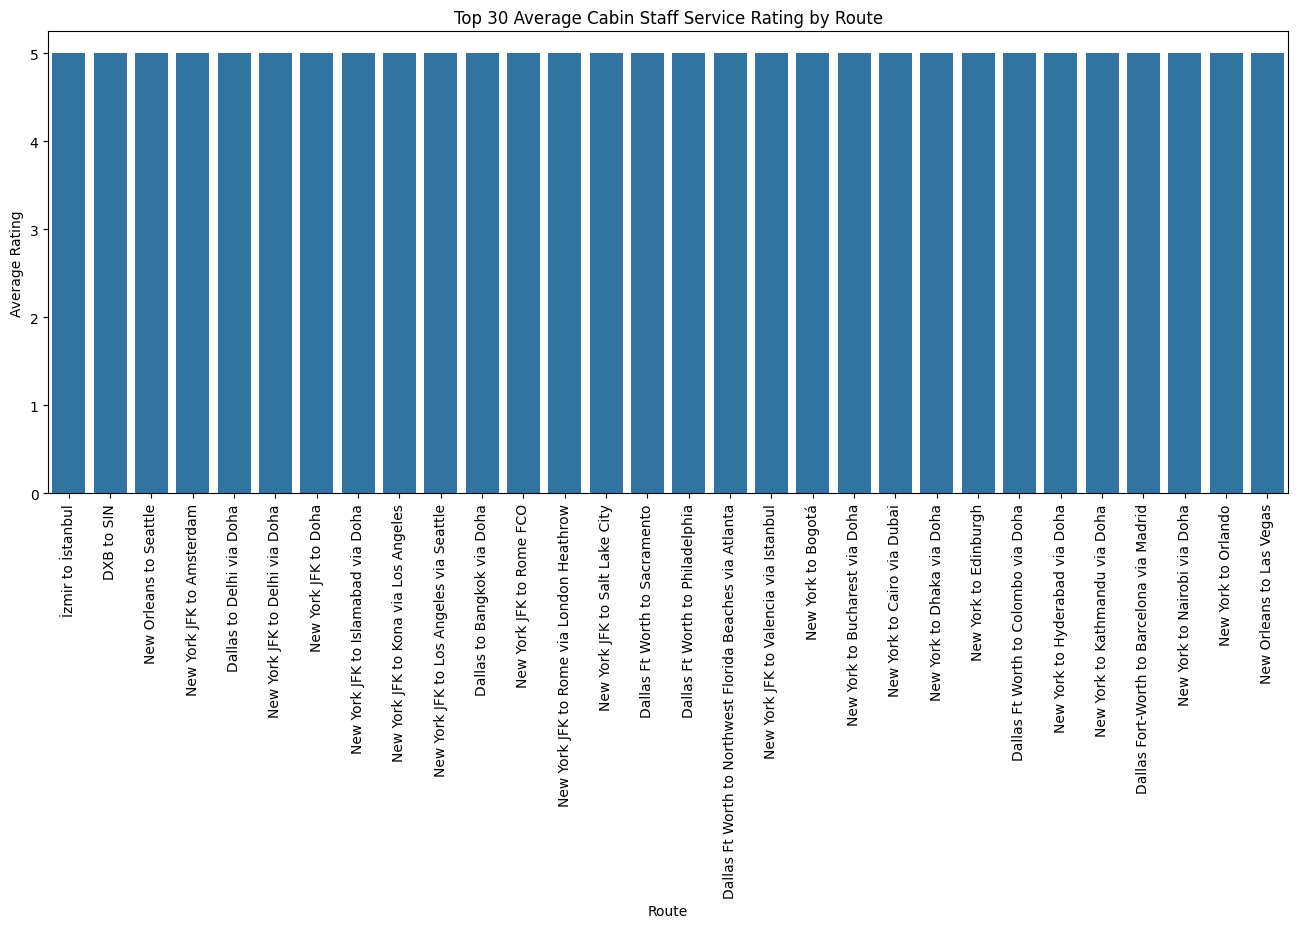

In [366]:

# Plotting the results
plt.figure(figsize=(16, 6))
sns.barplot(x="route", y="cabin_staff_service", data=top_10_cabin_service)
plt.title("Top 30 Average Cabin Staff Service Rating by Route")
plt.xlabel("Route")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.show()


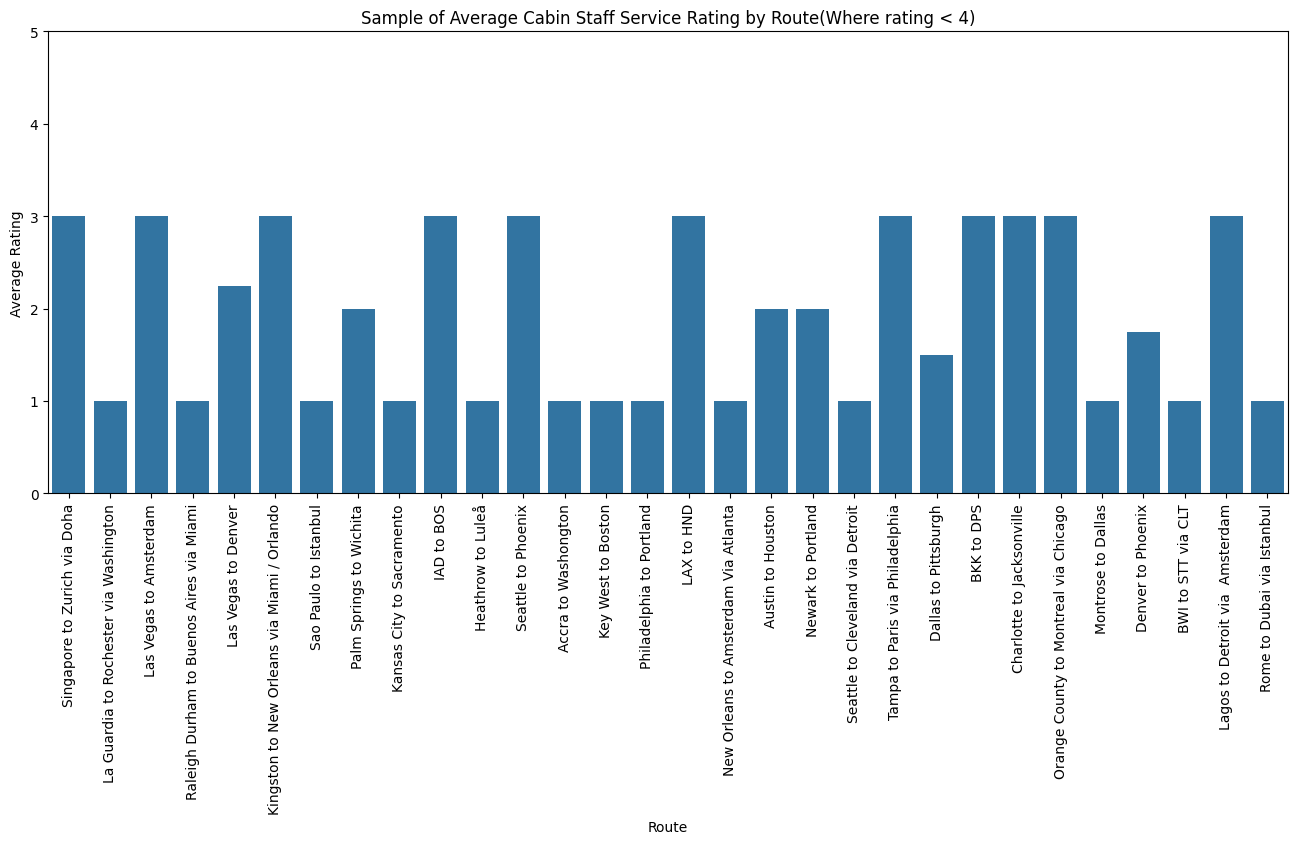

In [365]:

# Plotting the results
plt.figure(figsize=(16, 6))
sns.barplot(x="route", y="cabin_staff_service", data=sample_cabin_service)
plt.title("Sample of Average Cabin Staff Service Rating by Route(Where rating < 4)")
plt.xlabel("Route")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.xticks(rotation=90)
plt.show()



### Analysis Summary

1. **Grouping Routes by Cabin Staff Service Ratings**:
   We grouped routes based on the average cabin staff service ratings to understand which routes excel in this area and which fall short.

2. **Top-Performing Routes**:
   - We identified the top 30 routes with the highest average cabin staff service ratings. These routes demonstrate strong performance in terms of cabin service, suggesting that current staffing levels and service quality meet or exceed passenger expectations.
   - Investing additional resources in these routes may yield diminishing returns as they already exhibit high levels of satisfaction in cabin service.

3. **Underperforming Routes (Sample of Routes with Ratings Below 4)**:
   - To focus on improvement areas, we filtered routes where the average cabin staff service rating falls below 4. These routes were then ranked to highlight those with the lowest ratings.
   - A random sample of 30 routes from this subset was selected for further evaluation, representing routes that would benefit most from investment in cabin staff service to enhance the passenger experience.

### Recommendations for Investment

1. **Priority Routes for Investment**:
   - The sampled routes with ratings below 4 are prime candidates for further investment in cabin staff service. These routes demonstrate lower-than-average passenger satisfaction in cabin service, which may negatively impact the overall travel experience.
   - Resources could be directed toward additional staff training, customer service improvements, or increased staffing during peak times on these routes.

2. **Cost-Effective Allocation**:
   - Since these routes have room for improvement, targeted investments in the form of enhanced service training or quality monitoring could significantly improve customer satisfaction without requiring substantial capital.

### Suggested Action Plan

1. **Enhanced Training for Cabin Crew on Low-Rated Routes**:
   - Develop focused training modules for cabin crew assigned to these routes, emphasizing service quality, passenger interaction, and handling feedback effectively.

2. **Monitoring and Feedback Collection**:
   - Implement feedback mechanisms specifically on these routes to track the impact of service improvements and adjust strategies based on passenger input.

3. **Re-Evaluation of Results**:
   - After implementing these improvements, re-evaluate these routes’ cabin service ratings in subsequent quarters to assess whether the changes yield positive results in customer satisfaction.

---

### Conclusion

This targeted investment approach ensures that resources are allocated where they are most needed, enabling cost optimization while improving customer satisfaction on underperforming routes.